<a href="https://colab.research.google.com/github/Jayravalcode/Jayravalcode.github.io/blob/main/Cerebulb_Data_Science_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Files from GDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Convert Files into dataframe

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df1 = pd.read_csv("/content/drive/MyDrive/Data Science Work/Payload trucks 1_10 updated.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data Science Work/Payload trucks 11_20 updated.csv")


<ipython-input-3-7d05d20fe239>:1: DtypeWarning: Columns (0,1,2,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/drive/MyDrive/Data Science Work/Payload trucks 1_10 updated.csv")
<ipython-input-3-7d05d20fe239>:2: DtypeWarning: Columns (0,1,2,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/MyDrive/Data Science Work/Payload trucks 11_20 updated.csv")


In [4]:
print(f"Data_1_10 ({len(df1.columns)} columns):")
print(df1.columns)

print(f"\nData_11_20 ({len(df2.columns)} columns):")
print(df2.columns)


Data_1_10 (15 columns):
Index(['MACH_SER_NO', 'OCUR_TS Date', 'OCUR_TS Time', 'PAYLD_WT', 'LD_TM',
       'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC', 'LD_STOP_TM',
       'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT', 'FUEL_USED_IN_CYC',
       'SHFT_CT', 'OCUR_TS_LOCAL'],
      dtype='object')

Data_11_20 (17 columns):
Index(['MACH_SER_NO', 'OCUR_TS', 'Unnamed: 2', 'SMU', 'PAYLD_WT', 'LD_TM',
       'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC', 'LD_STOP_TM',
       'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT', 'FUEL_USED_IN_CYC',
       'SHFT_CT', 'OCUR_TS_L', 'OCAL'],
      dtype='object')


In [5]:
unique_df1 = set(df1.columns) - set(df2.columns)
unique_df2 = set(df2.columns) - set(df1.columns)

# Display the results
print("Columns unique to DataFrame 1:")
print(unique_df1)

print("\nColumns unique to DataFrame 2:")
print(unique_df2)

Columns unique to DataFrame 1:
{'OCUR_TS_LOCAL', 'OCUR_TS Date', 'OCUR_TS Time'}

Columns unique to DataFrame 2:
{'OCUR_TS_L', 'OCUR_TS', 'SMU', 'OCAL', 'Unnamed: 2'}


-----------------------------------------------------------------------

# Data Processing Step

In [6]:
df1.dtypes

MACH_SER_NO          object
OCUR_TS Date         object
OCUR_TS Time         object
PAYLD_WT            float64
LD_TM               float64
EMTY_STOP_TM        float64
EMTY_TRAV_TM        float64
EMTY_TRAV_DSTNC     float64
LD_STOP_TM          float64
LD_TRAV_TM          float64
LD_TRAV_DSTNC       float64
LD_PASS_CT          float64
FUEL_USED_IN_CYC    float64
SHFT_CT             float64
OCUR_TS_LOCAL        object
dtype: object

In [7]:
df2.dtypes

MACH_SER_NO          object
OCUR_TS              object
Unnamed: 2           object
SMU                 float64
PAYLD_WT            float64
LD_TM               float64
EMTY_STOP_TM        float64
EMTY_TRAV_TM        float64
EMTY_TRAV_DSTNC     float64
LD_STOP_TM          float64
LD_TRAV_TM          float64
LD_TRAV_DSTNC       float64
LD_PASS_CT          float64
FUEL_USED_IN_CYC    float64
SHFT_CT             float64
OCUR_TS_L            object
OCAL                 object
dtype: object

In [8]:
df1.head(5)

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0,22-JUL-16 12.44.52.000000000 AM
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0,22-JUL-16 01.30.20.000000000 AM
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0,22-JUL-16 02.02.59.000000000 AM
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0,22-JUL-16 02.54.33.000000000 AM
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0,22-JUL-16 03.38.55.000000000 AM


In [9]:
df2.head(5)

,MACH_SER_NO,OCUR_TS,Unnamed: 2,SMU,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_L,OCAL
0,Truck 11,22-Jul-16,12.07.18.000000000 AM,23018.03444,399.5,92.0,129.0,231.0,1.6,67.0,513.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.07.18.000000000 AM
1,Truck 11,22-Jul-16,12.25.11.000000000 AM,23018.33250,333.8,133.0,92.0,362.0,2.8,75.0,472.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.25.11.000000000 AM
2,Truck 11,22-Jul-16,12.44.52.000000000 AM,23018.66056,361.2,120.0,30.0,318.0,2.7,76.0,475.0,2.7,4.0,85.171766,66.0,22-Jul-16,11.44.52.000000000 AM
3,Truck 11,22-Jul-16,01.02.31.000000000 AM,23018.95500,365.2,109.0,63.0,305.0,2.7,73.0,497.0,2.8,4.0,86.591295,74.0,22-Jul-16,12.02.31.000000000 PM
4,Truck 11,22-Jul-16,01.20.42.000000000 AM,23019.25806,327.8,93.0,43.0,327.0,2.4,77.0,496.0,2.8,4.0,83.752236,83.0,22-Jul-16,12.20.42.000000000 PM


Rename or filled the important columns name
1. filled the name in where the column name is unnamed
2. And changed the name of the required column.

In [10]:
df2.rename(columns={"Unnamed: 2": "OCUR_TS Time"}, inplace=True)
df2.rename(columns={"OCUR_TS": "OCUR_TS Date"}, inplace=True)


In [11]:
df2.head(5)

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,SMU,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_L,OCAL
0,Truck 11,22-Jul-16,12.07.18.000000000 AM,23018.03444,399.5,92.0,129.0,231.0,1.6,67.0,513.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.07.18.000000000 AM
1,Truck 11,22-Jul-16,12.25.11.000000000 AM,23018.33250,333.8,133.0,92.0,362.0,2.8,75.0,472.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.25.11.000000000 AM
2,Truck 11,22-Jul-16,12.44.52.000000000 AM,23018.66056,361.2,120.0,30.0,318.0,2.7,76.0,475.0,2.7,4.0,85.171766,66.0,22-Jul-16,11.44.52.000000000 AM
3,Truck 11,22-Jul-16,01.02.31.000000000 AM,23018.95500,365.2,109.0,63.0,305.0,2.7,73.0,497.0,2.8,4.0,86.591295,74.0,22-Jul-16,12.02.31.000000000 PM
4,Truck 11,22-Jul-16,01.20.42.000000000 AM,23019.25806,327.8,93.0,43.0,327.0,2.4,77.0,496.0,2.8,4.0,83.752236,83.0,22-Jul-16,12.20.42.000000000 PM


In [12]:
print("Total rows in df1 before dropping missing values:", df1.shape[0])
print("Total rows in df2 before dropping missing values:", df2.shape[0])

Total rows in df1 before dropping missing values: 70653
Total rows in df2 before dropping missing values: 106989


In [13]:
# Drop rows with missing values
df1 = df1.dropna()
df2 = df2.dropna()

print("Total rows in df1 after dropping missing values:", df1.shape[0])
print("Total rows in df2 after dropping missing values:", df2.shape[0])

Total rows in df1 after dropping missing values: 4404
Total rows in df2 after dropping missing values: 10426


Insights or outcomes which need to be derived from dataset.
1. Total tones moved by each truck as well as all the trucks combined.  
2. Average Tones moved per truck. -
3. Tones per Gallon per distance travelled matrix for each truck and all trucks.
4. Which truck is running most efficient and which truck is running most inefficient as per as the matrix in item number 3?
5. Show Visually which truck has travelled empty most distance.
6. Show visually which truck has Max and Min Gear Shifts per Mile
7. Which truck has max stop time in empty and
8. Total distance travelled by each truck as well as all trucks combined.
9. Predict the future production capacity for each truck (Prediction & forecasting needs to be made for next 15 days)
10. Identify truck which has lowest and highest production prediction.
11. Recommendation settings for each parameter to reduce fuel consumption.
12. Sky is the limit here – show something creative from this data set using your valuable skills.



1. Total tones moved by each truck as well as all the trucks combined.

In [ ]:
# common_columns = [col for col in df1.columns if col in df2.columns]
# df3 = pd.concat([df1[common_columns], df2[common_columns]], ignore_index=True)

# # Fill NaN values with 0
# df3.fillna(0, inplace=True)
# df3

In [14]:
df3 = pd.concat([df1, df2], ignore_index=True)
df3.fillna(0)

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL,SMU,OCUR_TS_L,OCAL
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0,22-JUL-16 12.44.52.000000000 AM,0.00000,0,0
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0,22-JUL-16 01.30.20.000000000 AM,0.00000,0,0
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0,22-JUL-16 02.02.59.000000000 AM,0.00000,0,0
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0,22-JUL-16 02.54.33.000000000 AM,0.00000,0,0
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0,22-JUL-16 03.38.55.000000000 AM,0.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14825,Truck 20,21-Aug-16,11.13.10.000000000 PM,331.8,111.0,221.0,366.0,3.3,67.0,657.0,3.3,4.0,109.776943,72.0,0,12079.10722,22-Aug-16,10.13.10.000000000 AM
14826,Truck 20,21-Aug-16,11.37.52.000000000 PM,335.7,106.0,277.0,386.0,3.3,70.0,638.0,3.3,4.0,109.776943,65.0,0,12079.51889,22-Aug-16,10.37.52.000000000 AM
14827,Truck 20,22-Aug-16,12.03.29.000000000 AM,401.2,129.0,146.0,373.0,3.3,70.0,679.0,3.3,5.0,118.767296,57.0,0,12079.94583,22-Aug-16,11.03.29.000000000 AM
14828,Truck 20,22-Aug-16,12.27.45.000000000 AM,374.1,154.0,78.0,359.0,3.3,131.0,680.0,3.3,5.0,119.240472,64.0,0,12080.35028,22-Aug-16,11.27.45.000000000 AM


In [ ]:
# gf = df3.to_csv("new.csv")

In [15]:
# Group by "MACH_SER_NO" and calculate the sum of "PAYLD_WT" for each truck
total_tons_by_truck = df3.groupby('MACH_SER_NO')['PAYLD_WT'].sum().round(2)

# Calculate the combined total for all trucks
total_tons_combined = df3['PAYLD_WT'].sum().round(2)

# Display the results
print("Total Tons Moved by Each Truck:")
print(total_tons_by_truck)

print("\nCombined Total Tons Moved by All Trucks:")
print(total_tons_combined)

Total Tons Moved by Each Truck:
MACH_SER_NO
Truck 1     230435.9
Truck 10     57807.9
Truck 11    424301.2
Truck 12    356100.0
Truck 13    248355.3
Truck 14    341020.2
Truck 15    255738.1
Truck 16    403566.2
Truck 17    378664.7
Truck 18    392733.1
Truck 19    405962.9
Truck 2      75444.6
Truck 20    393770.4
Truck 3     101153.2
Truck 4     165134.7
Truck 5     175292.3
Truck 6     149718.7
Truck 7      84593.8
Truck 8     189969.1
Truck 9     240837.4
Name: PAYLD_WT, dtype: float64

Combined Total Tons Moved by All Trucks:
5070599.7


2. Average Tones moved per truck.

In [16]:
average_tons = df3.groupby('MACH_SER_NO')['PAYLD_WT'].mean().round(2)
average_tons

MACH_SER_NO
Truck 1     338.88
Truck 10    354.65
Truck 11    350.95
Truck 12    352.23
Truck 13    346.38
Truck 14    312.58
Truck 15    344.66
Truck 16    351.54
Truck 17    348.36
Truck 18    348.79
Truck 19    348.17
Truck 2     344.50
Truck 20    348.78
Truck 3     365.17
Truck 4     336.32
Truck 5     351.29
Truck 6     348.99
Truck 7     334.36
Truck 8     269.46
Truck 9     350.05
Name: PAYLD_WT, dtype: float64

3. Tones per Gallon per distance travelled matrix for each truck and all trucks.

In [17]:
# Tons per gallon
df3['Tons_per_Gallon'] = df3['PAYLD_WT'] / df3['FUEL_USED_IN_CYC']
df3['Tons_per_Gallon']

0        4.506389
1        1.891359
2        2.578753
3        2.449660
4        1.731325
           ...   
14825    3.022493
14826    3.058019
14827    3.378034
14828    3.137358
14829    3.396104
Name: Tons_per_Gallon, Length: 14830, dtype: float64

For example tons per gallon is (x). for finding Tones per gallon per distance we divided the tons per gallon by distance coverd by truck. we consider **loaded travel distance** for finding the tones per gallon per distnce

In [18]:
# Add a check for zero in 'LD_TRAV_DSTNC' before division
df3['Tons_per_Gallon_per_Distance'] = df3['Tons_per_Gallon'] / df3['LD_TRAV_DSTNC'].replace(0, np.nan)

# Print the number of missing values
missing_values = df3['Tons_per_Gallon_per_Distance'].isnull().sum()
print(f"Number of missing values in 'Tons_per_Gallon_per_Distance': {missing_values}")


Number of missing values in 'Tons_per_Gallon_per_Distance': 8


In [19]:
nan_check = df3[df3['Tons_per_Gallon_per_Distance'].isnull()]
nan_check

,MACH_SER_NO,OCUR_TS Date,OCUR_TS Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL,SMU,OCUR_TS_L,OCAL,Tons_per_Gallon,Tons_per_Gallon_per_Distance
270,Truck 1,4-Aug-16,02.56.39.000000000 PM,16.5,1423.0,0.0,0.0,0.0,4085.0,37.0,0.0,1.0,6.151294,27.0,04-AUG-16 09.56.39.000000000 AM,NaN,NaN,NaN,2.682362,NaN
3648,Truck 8,18-Aug-16,05.55.35.000000000 AM,13.4,38.0,30.0,24.0,0.0,61.0,33.0,0.0,1.0,4.258588,8.0,18-AUG-16 12.55.35.000000000 AM,NaN,NaN,NaN,3.146583,NaN
4217,Truck 9,12-Aug-16,07.16.24.000000000 PM,346.1,229.0,1104.0,974.0,5.2,320.0,30.0,0.0,4.0,67.191060,87.0,12-AUG-16 02.16.24.000000000 PM,NaN,NaN,NaN,5.150983,NaN
5952,Truck 12,4-Aug-16,10.44.59.000000000 AM,375.9,133.0,129.0,632.0,4.3,7342.0,39.0,0.0,5.0,33.122353,66.0,NaN,23136.36167,4-Aug-16,09.44.59.000000000 PM,11.348831,NaN
6024,Truck 12,6-Aug-16,06.52.30.000000000 PM,437.3,116.0,567.0,758.0,5.1,115.0,55.0,0.0,4.0,58.673883,50.0,NaN,23176.00556,7-Aug-16,05.52.30.000000000 AM,7.453060,NaN
10824,Truck 17,7-Aug-16,03.15.37.000000000 PM,50.3,267.0,98.0,398.0,3.5,1515.0,17.0,0.0,1.0,14.668471,48.0,NaN,14614.26472,8-Aug-16,02.15.37.000000000 AM,3.429124,NaN
13526,Truck 19,17-Aug-16,05.39.16.000000000 PM,340.2,144.0,76.0,107.0,0.1,125.0,55.0,0.0,5.0,9.463530,26.0,NaN,12339.25000,18-Aug-16,04.39.16.000000000 AM,35.948533,NaN
13527,Truck 19,17-Aug-16,05.48.05.000000000 PM,385.9,142.0,289.0,111.0,0.1,63.0,57.0,0.0,5.0,10.883059,28.0,NaN,12339.38500,18-Aug-16,04.48.05.000000000 AM,35.458781,NaN


In [ ]:
# df3['Tons_per_Gallon_per_Distance'] = df3['Tons_per_Gallon'] / df3['LD_TRAV_DSTNC']
# df3['Tons_per_Gallon_per_Distance']

4. Which truck is running most efficient and which truck is running most inefficient as per as the matrix in item number 3?

In [20]:
group = df3.groupby('MACH_SER_NO')['Tons_per_Gallon_per_Distance'].mean().round(2)
group

MACH_SER_NO
Truck 1     1.25
Truck 10    0.81
Truck 11    1.82
Truck 12    1.19
Truck 13    1.38
Truck 14    1.23
Truck 15    2.09
Truck 16    1.83
Truck 17    1.59
Truck 18    1.20
Truck 19    1.41
Truck 2     1.37
Truck 20    1.44
Truck 3     1.11
Truck 4     1.21
Truck 5     1.84
Truck 6     1.04
Truck 7     1.20
Truck 8     0.82
Truck 9     0.93
Name: Tons_per_Gallon_per_Distance, dtype: float64

In [21]:
most_efficient = group.idxmin()
most_efficient

'Truck 10'

In [22]:
most_inefficient = group.idxmax()
most_inefficient

'Truck 15'

5. Show Visually which truck has travelled empty most distance.

In [23]:
empty_trv = df3.groupby('MACH_SER_NO')['EMTY_TRAV_DSTNC'].sum().round(2)
empty_trv.idxmax() #return the max value of the column
empty_trv.max()
print(f'{empty_trv.idxmax()}--->{empty_trv.max()}')

Truck 11--->4879.7


In [24]:
sorted = empty_trv.sort_values(ascending=False).index
sorted

Index(['Truck 11', 'Truck 18', 'Truck 20', 'Truck 16', 'Truck 19', 'Truck 14',
       'Truck 17', 'Truck 12', 'Truck 15', 'Truck 9', 'Truck 8', 'Truck 1',
       'Truck 13', 'Truck 5', 'Truck 4', 'Truck 6', 'Truck 3', 'Truck 7',
       'Truck 2', 'Truck 10'],
      dtype='object', name='MACH_SER_NO')

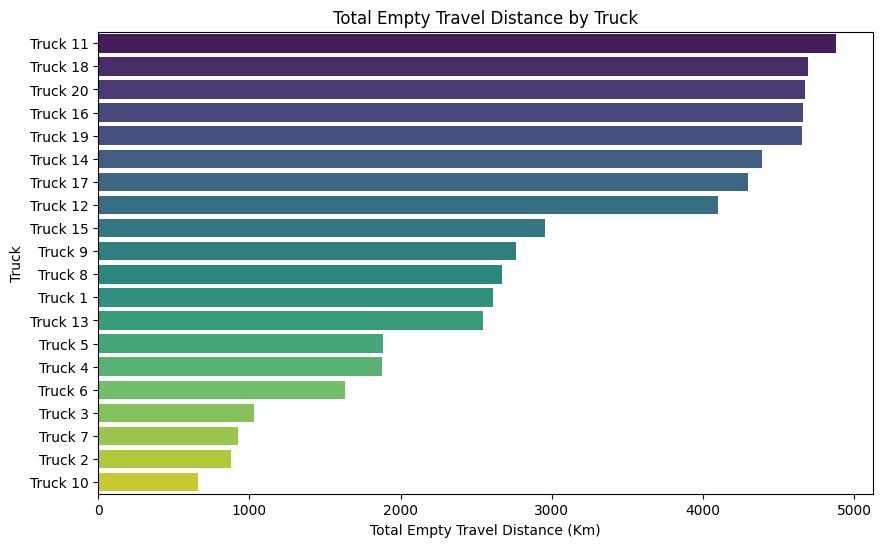

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=empty_trv[sorted], y=sorted, palette='viridis')
plt.xlabel('Total Empty Travel Distance (Km)')
plt.ylabel('Truck')
plt.title('Total Empty Travel Distance by Truck')

# Show the plot
plt.show()

6. Show visually which truck has Max and Min Gear Shifts per Mile

In [26]:
df3["Gear_shift_per_mile"] = df3['SHFT_CT'] / df3['LD_TRAV_DSTNC'].replace(0, np.nan)

#Truck gear shifting per mile
max_gear_shift = df3.loc[df3["Gear_shift_per_mile"].idxmax()]['MACH_SER_NO']
min_gear_shift = df3.loc[df3["Gear_shift_per_mile"].idxmin()]["MACH_SER_NO"]

gear_shift = df3.groupby('MACH_SER_NO')['Gear_shift_per_mile'].sum().round(2)
print(gear_shift)
print(f"{max_gear_shift}-->max_gear_shift, \n{min_gear_shift}-->min_gear_shift")

MACH_SER_NO
Truck 1     17900.50
Truck 10     3881.53
Truck 11    29397.88
Truck 12    23551.21
Truck 13    17217.52
Truck 14    26595.09
Truck 15    19812.89
Truck 16    30586.11
Truck 17    26250.22
Truck 18    26545.36
Truck 19    27323.84
Truck 2      5872.40
Truck 20    26621.02
Truck 3      7057.06
Truck 4     13550.15
Truck 5     14113.34
Truck 6     10971.64
Truck 7      6407.21
Truck 8     17399.87
Truck 9     18022.10
Name: Gear_shift_per_mile, dtype: float64
Truck 16-->max_gear_shift, 
Truck 9-->min_gear_shift


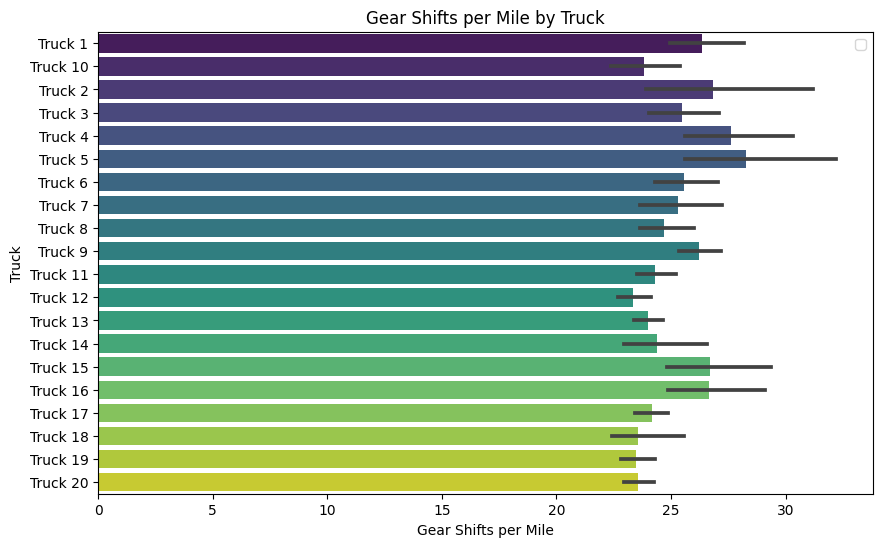

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gear_shift_per_mile', y='MACH_SER_NO', data=df3, palette='viridis')
plt.xlabel('Gear Shifts per Mile')
plt.ylabel('Truck')
plt.title('Gear Shifts per Mile by Truck')
plt.legend()

# Show the plot
plt.show()

7. Which truck has max stop time in empty and

In [28]:
# Assuming your DataFrame is named df3
max_stop_time_row = df3.loc[df3['EMTY_STOP_TM'].idxmax()]

# Extract truck and time information
max_stop_time_truck = max_stop_time_row['MACH_SER_NO']
max_stop_time = max_stop_time_row['EMTY_STOP_TM']

print(f"The truck with the maximum stop time in empty state is: {max_stop_time_truck}")
print(f"The corresponding time is: {max_stop_time}")


The truck with the maximum stop time in empty state is: Truck 16
The corresponding time is: 12149.0


8. Total distance travelled by each truck as well as all trucks combined.

In [29]:
Distance_all_truck = df3.groupby('MACH_SER_NO')['LD_TRAV_DSTNC','EMTY_TRAV_TM'].sum()
print(f'Loaded Travel Truck Distance ====>",{Distance_all_truck["LD_TRAV_DSTNC"].sum().round(2)}')
print(f'Empty Travel Truck Distance ====>",{Distance_all_truck["EMTY_TRAV_TM"].sum().round(2)}')

Loaded Travel Truck Distance ====>",63443.8
Empty Travel Truck Distance ====>",7722263.0


<ipython-input-29-49ac937b26c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Distance_all_truck = df3.groupby('MACH_SER_NO')['LD_TRAV_DSTNC','EMTY_TRAV_TM'].sum()


In [30]:
Total_distance = df3["LD_TRAV_DSTNC"].sum() + df3["EMTY_TRAV_TM"].sum()
Total_distance

7785706.8

9. Predict the future production capacity for each truck (Prediction & forecasting needs to be made for next 15 days)

# Arima Model

for sample truck

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

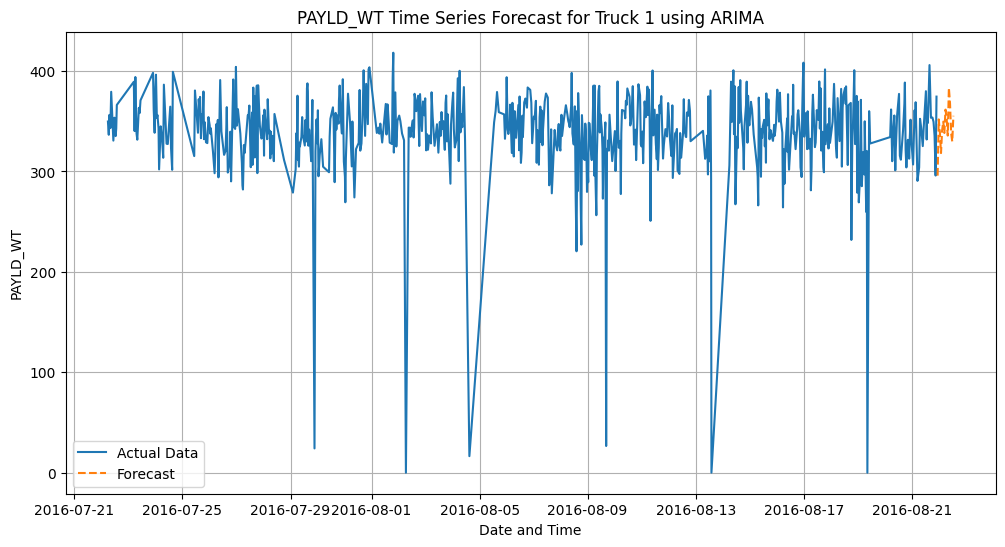

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming df3 is your concatenated DataFrame
df3['DateTime'] = pd.to_datetime(df3['OCUR_TS Date'] + ' ' + df3['OCUR_TS Time'], format="%d-%b-%y %I.%M.%S.%f %p")
df3.set_index('DateTime', inplace=True)

# Choose a specific truck (replace 'Truck 1' with the desired truck)
truck_name = 'Truck 1'
truck_data = df3[df3['MACH_SER_NO'] == truck_name]

# Extract the target variable
target_variable = 'PAYLD_WT'
data = truck_data[[target_variable]]

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
order = (100, 2, 0)  # You may need to tune these parameters
model = ARIMA(train, order=order)
model_fit = model.fit()

# Forecast future values
forecast_steps = 15
forecast_values = model_fit.forecast(steps=forecast_steps)

# Create datetime index for forecasted values
forecast_index = pd.date_range(truck_data.index[-1], periods=forecast_steps + 1, freq='H')[1:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Actual Data')
plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='dashed')
plt.title(f'{target_variable} Time Series Forecast for {truck_name} using ARIMA')
plt.xlabel('Date and Time')
plt.ylabel(target_variable)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df3 is your concatenated DataFrame
# df3['DateTime'] = pd.to_datetime(df3['OCUR_TS Date'] + ' ' + df3['OCUR_TS Time'], format="%d-%b-%y %I.%M.%S.%f %p")
# df3.set_index('DateTime', inplace=True)

# # Choose a specific truck (replace 'Truck 1' with the desired truck)
# truck_name = 'Truck 1'
# truck_data = df3[df3['MACH_SER_NO'] == truck_name]

# # Extract the target variable
# target_variable = 'PAYLD_WT'
# data = truck_data[[target_variable]]

# # Plot the actual data
# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data, label='Actual Data', color='blue')
# plt.title(f'{target_variable} Time Series for {truck_name}')
# plt.xlabel('Date and Time')
# plt.ylabel(target_variable)
# plt.legend()
# plt.grid(True)
# plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


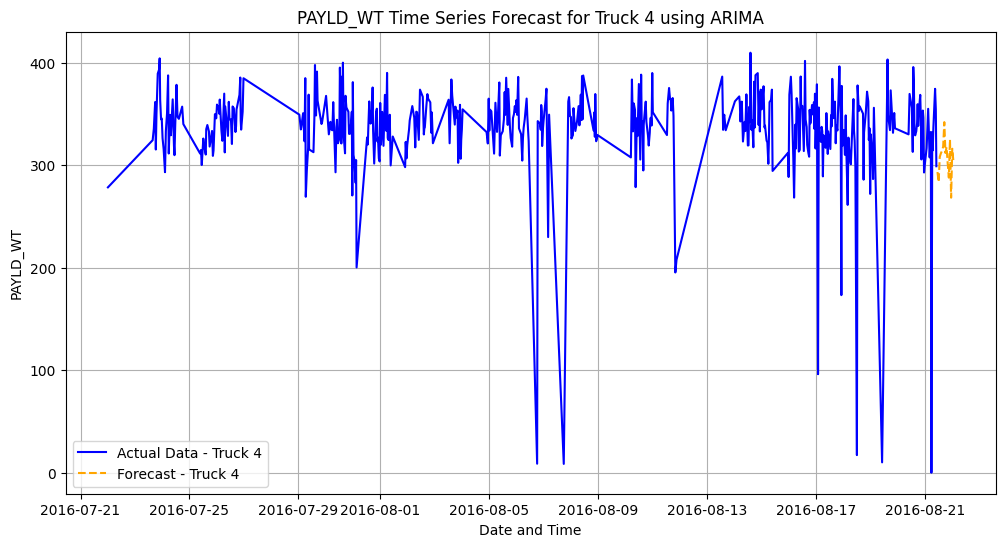

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

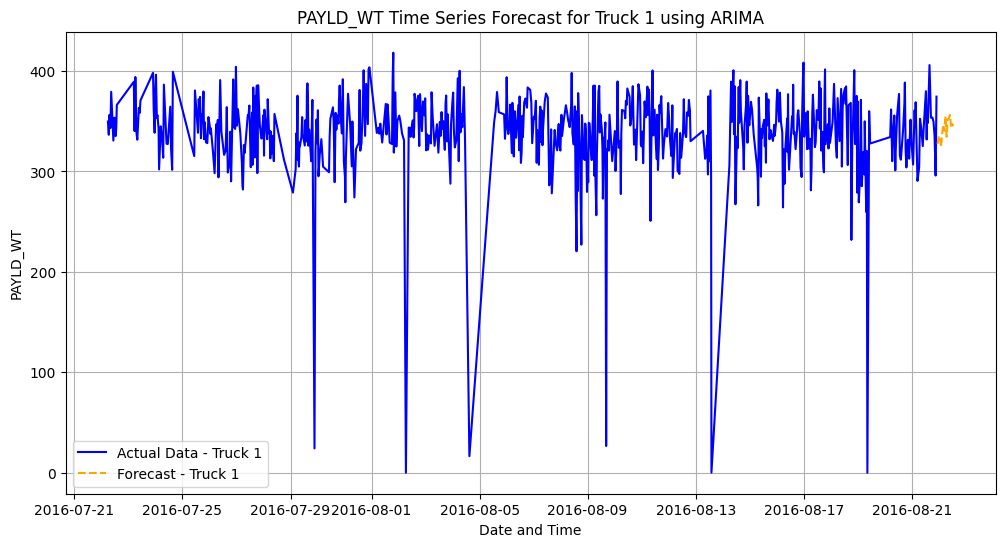

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

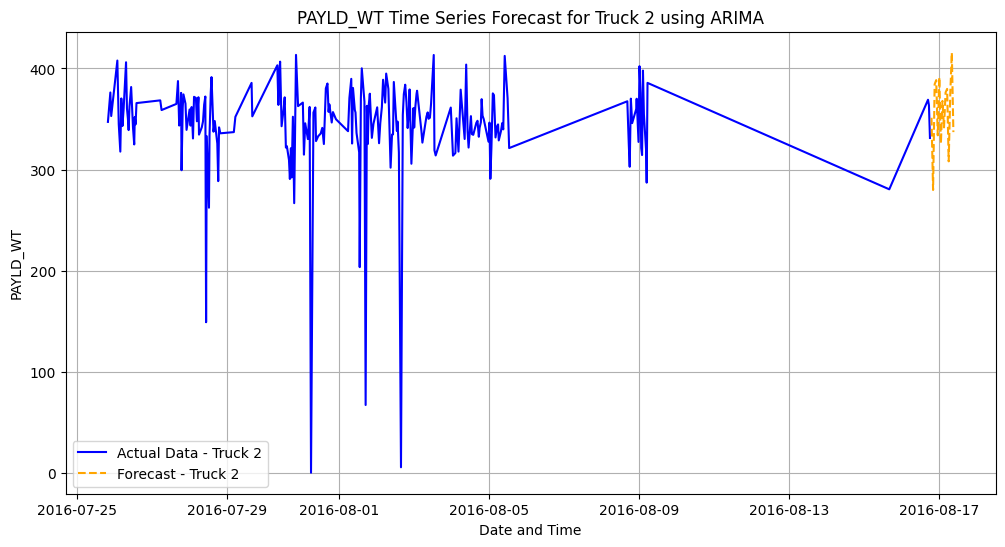

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

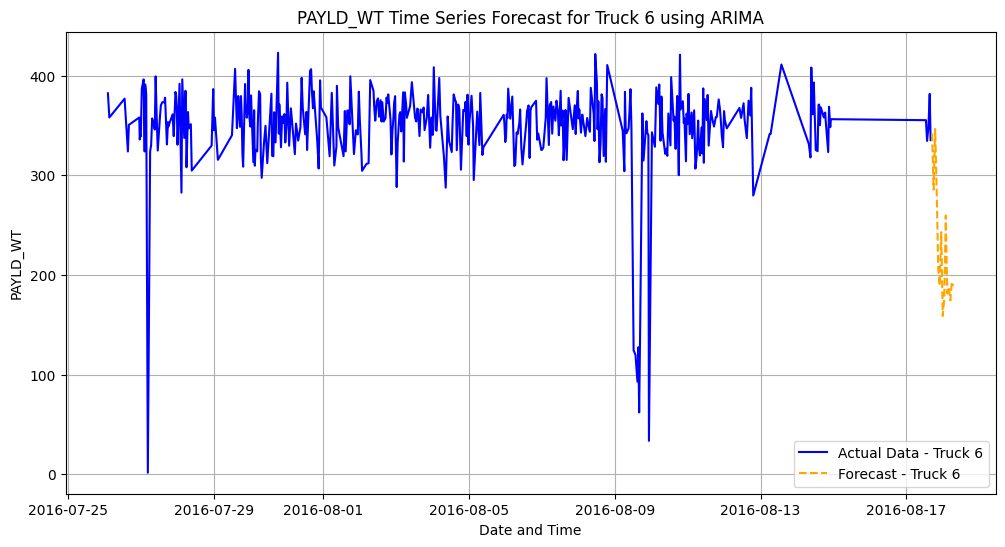

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

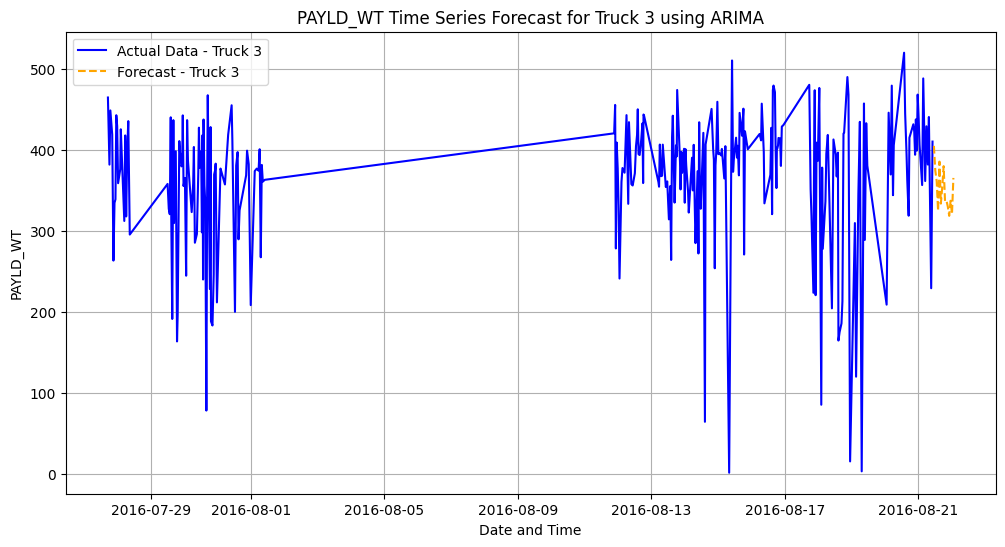

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

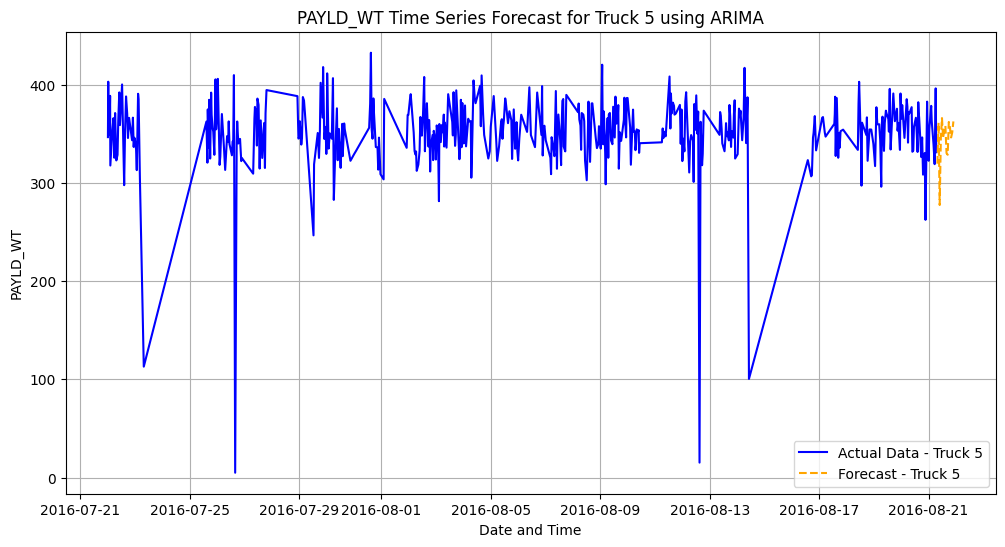

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

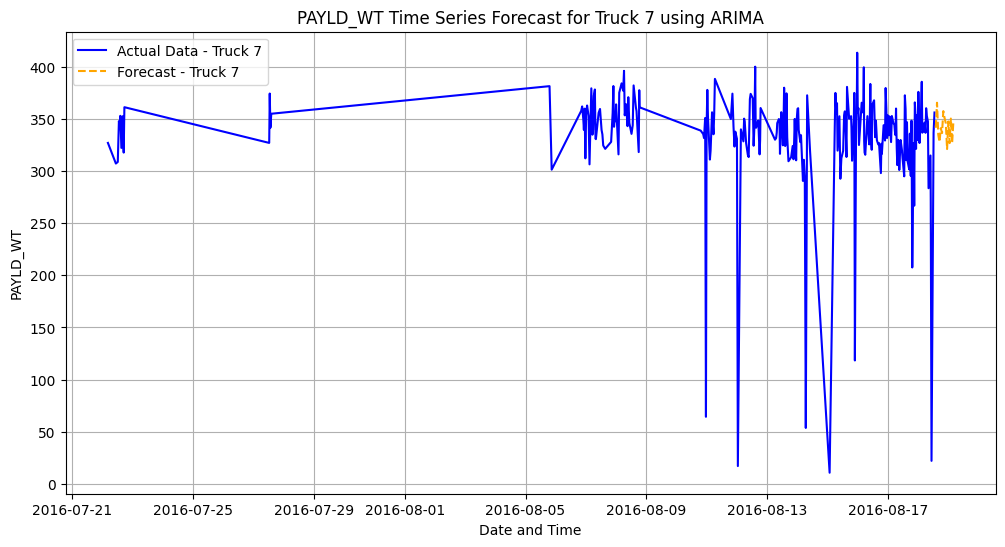

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

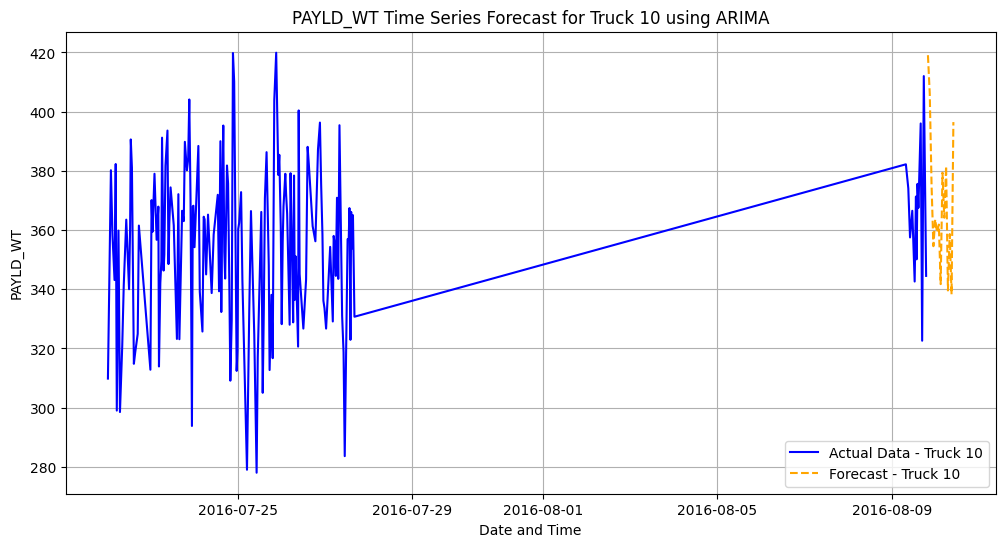

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

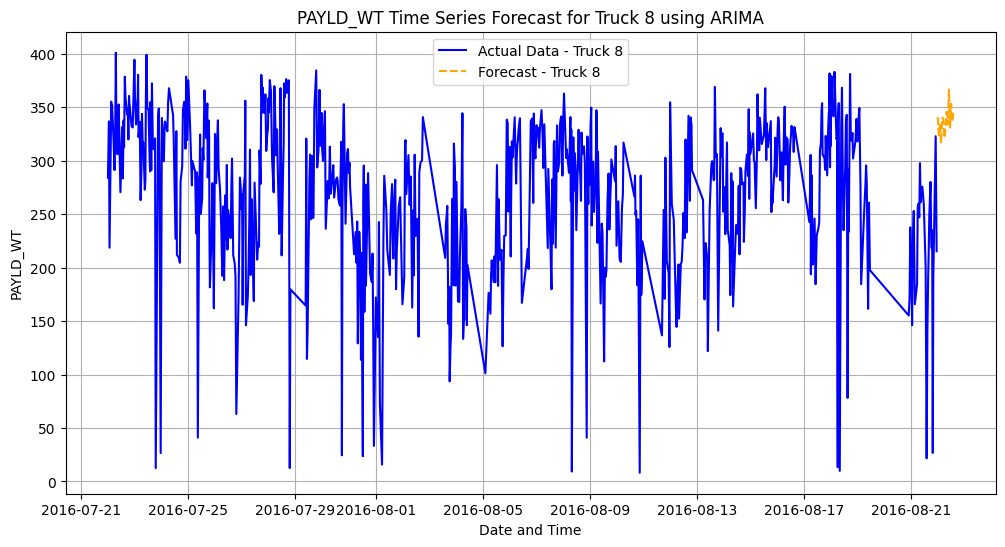

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

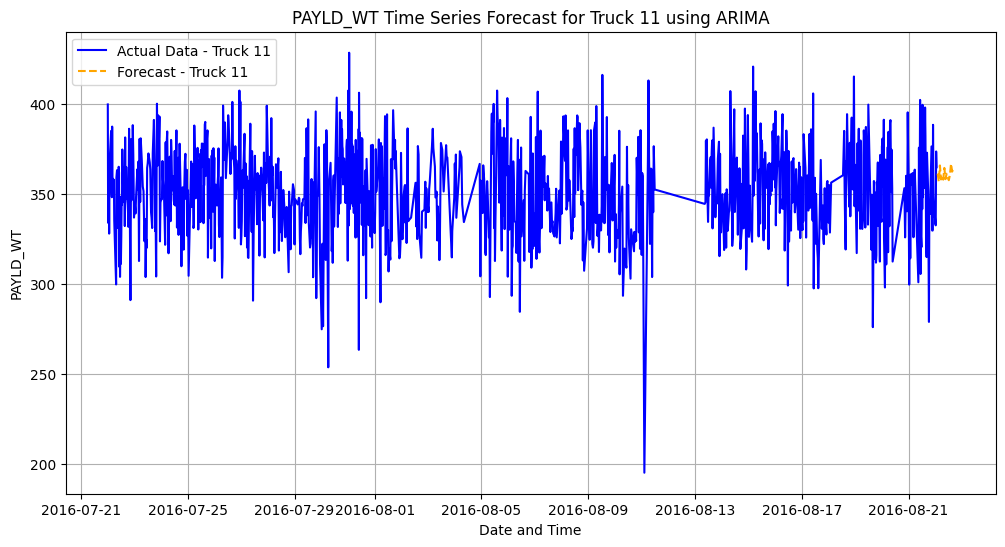

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


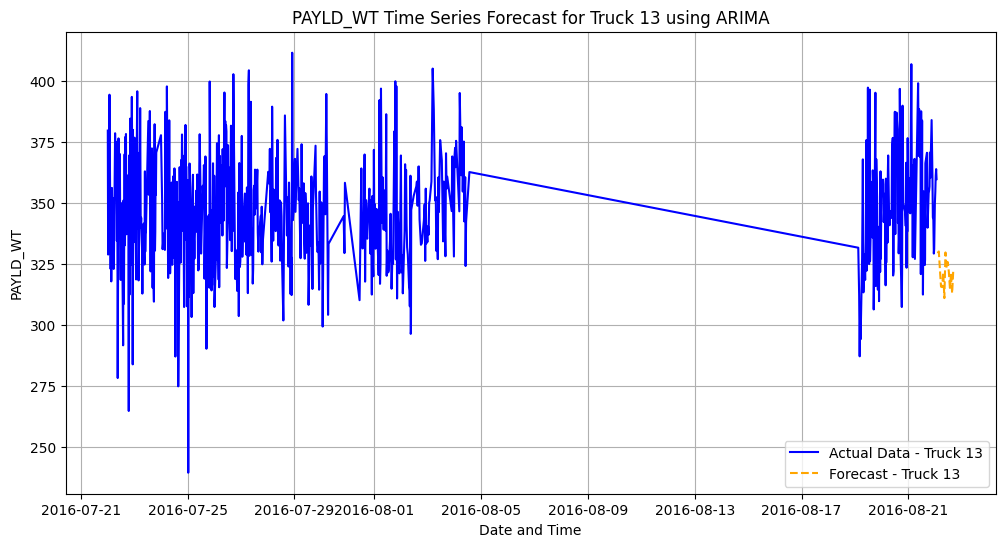

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

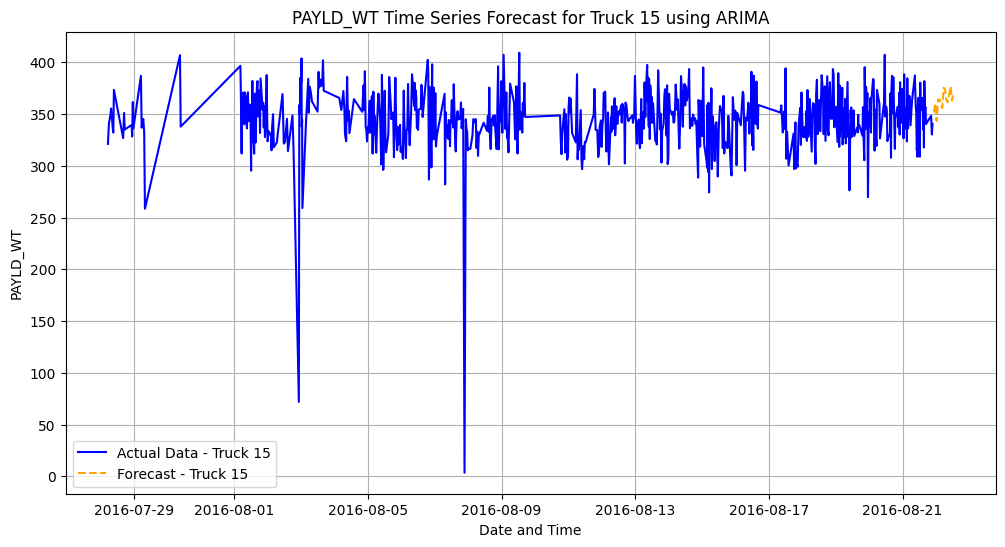

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

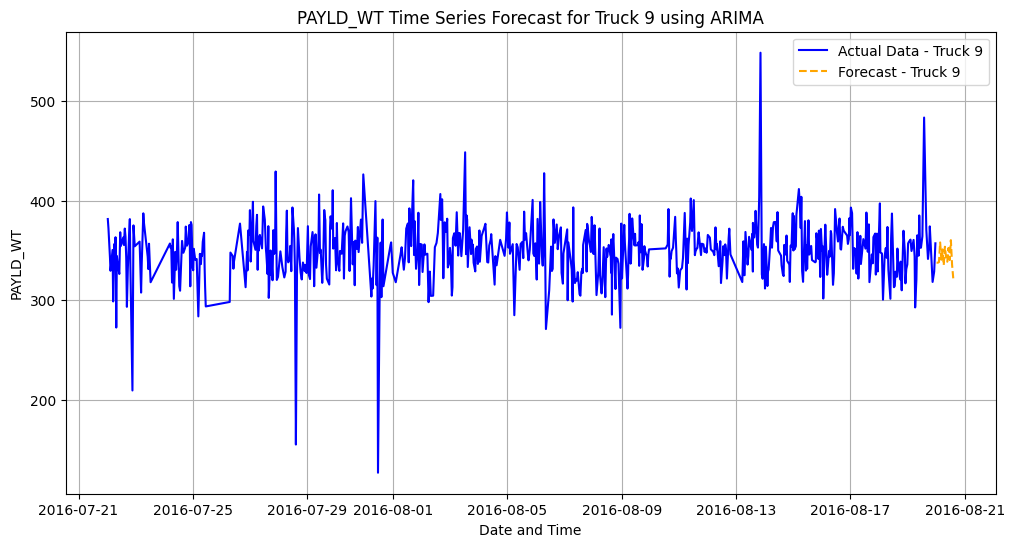

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

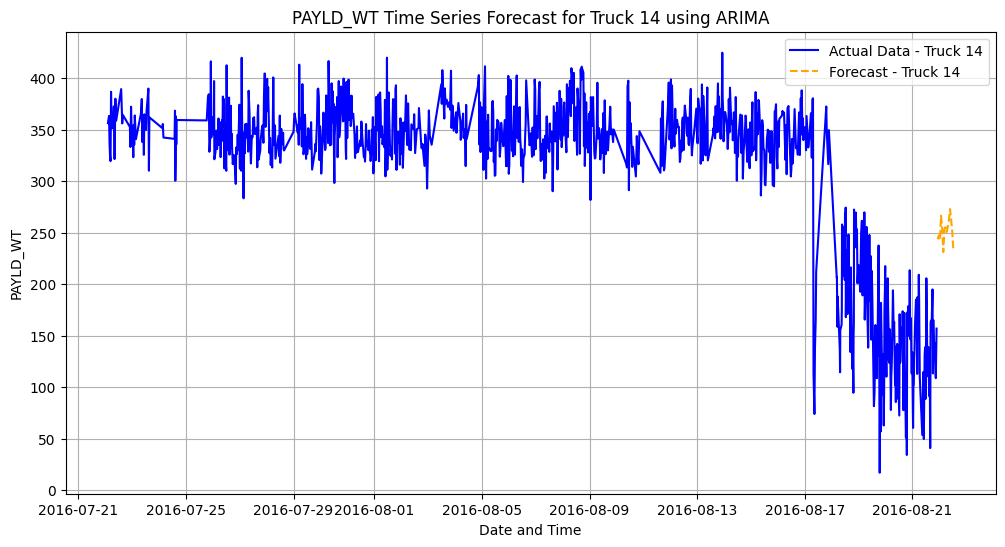

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

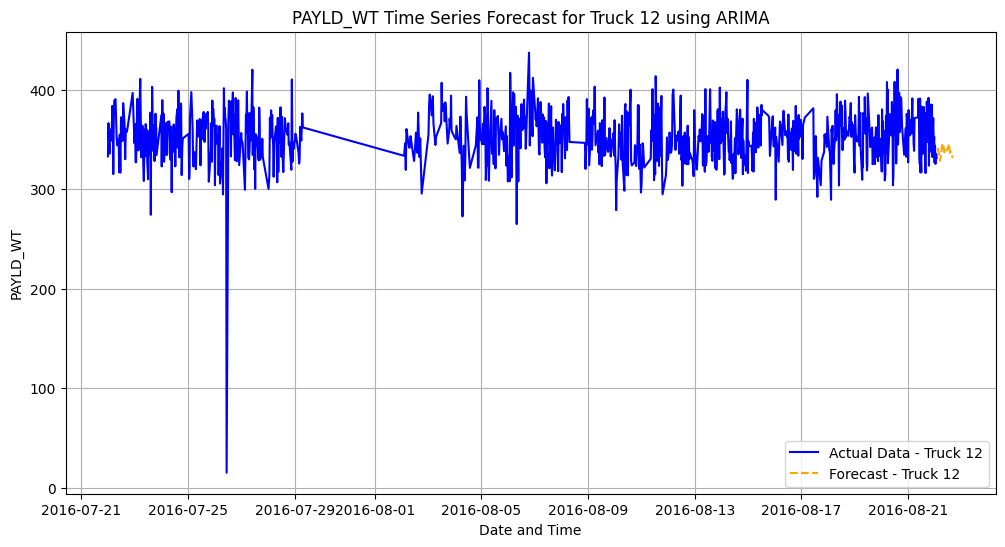

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


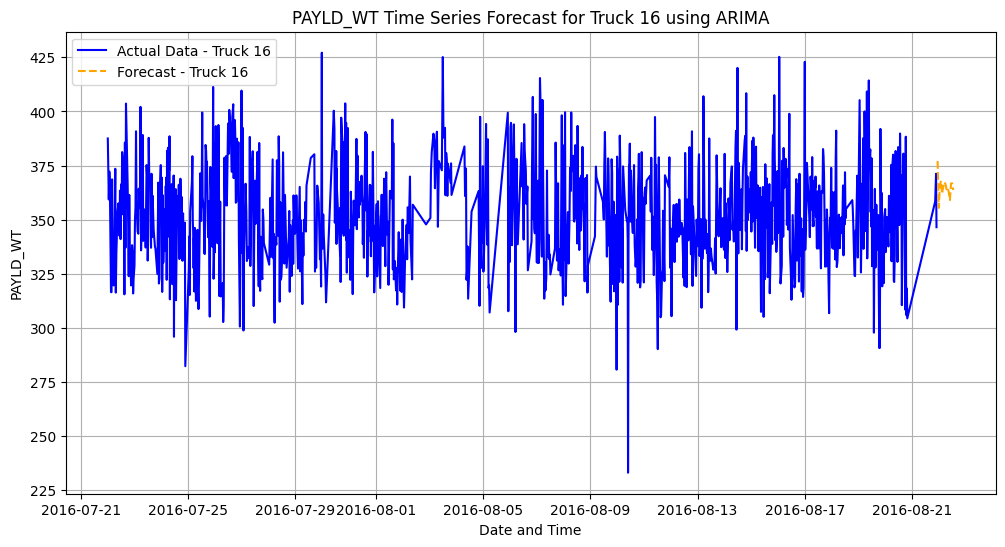

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


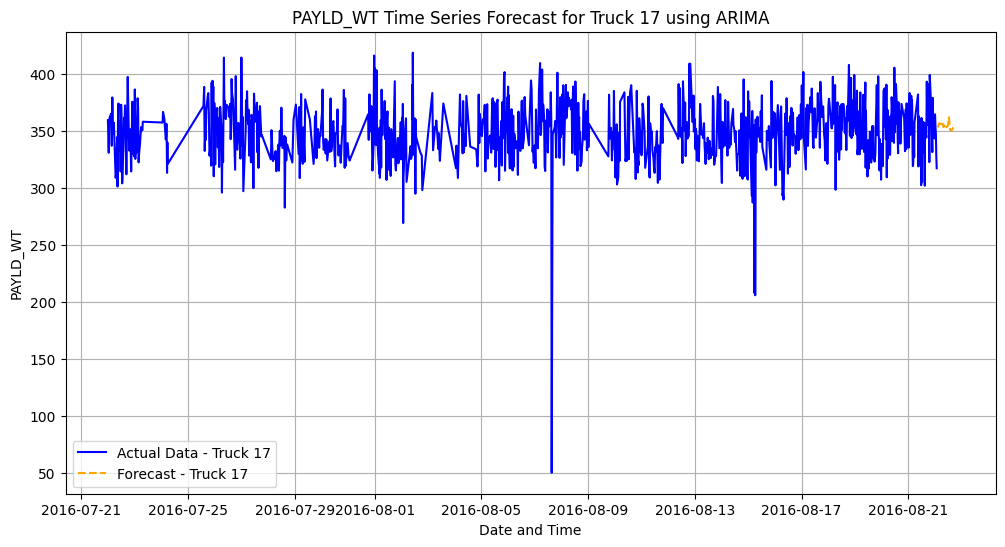

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

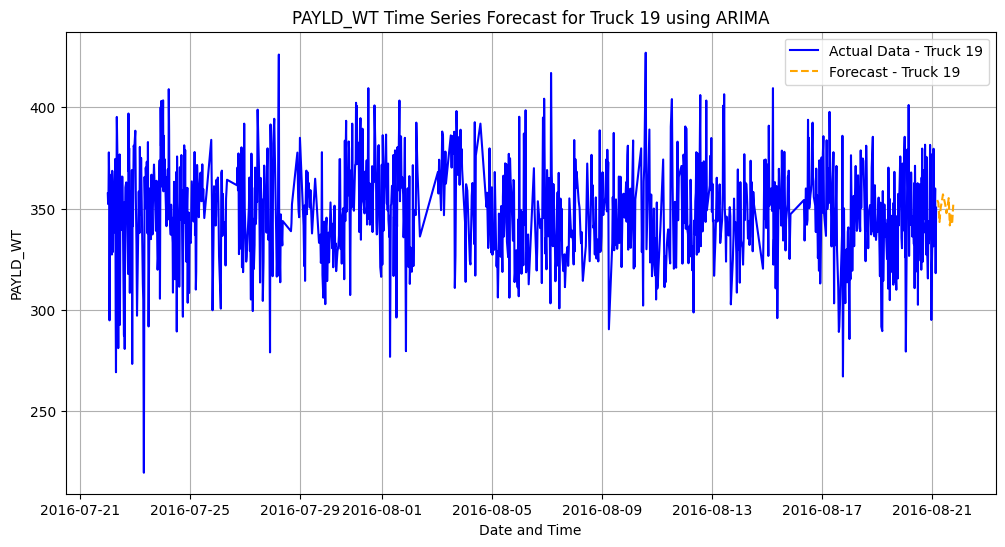

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

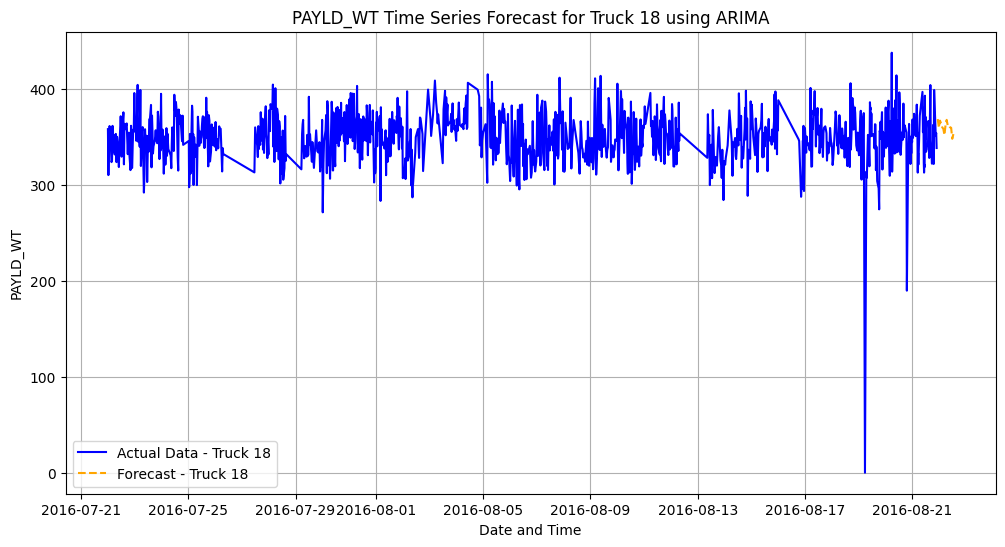

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


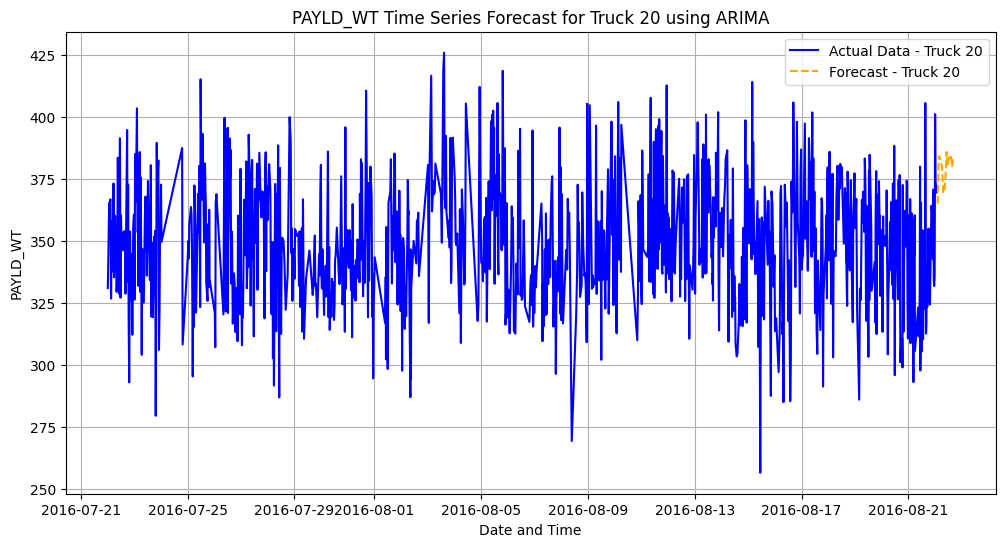

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from multiprocessing import Pool

# Assuming df3 is your concatenated DataFrame
df3['DateTime'] = pd.to_datetime(df3['OCUR_TS Date'] + ' ' + df3['OCUR_TS Time'], format="%d-%b-%y %I.%M.%S.%f %p")
df3.set_index('DateTime', inplace=True)

# Get the list of unique trucks
unique_trucks = df3['MACH_SER_NO'].unique()

# Set ARIMA model parameters
order = (50, 2, 0)  # You may need to tune these parameters
forecast_steps = 15

def forecast_for_truck(truck_name):
    try:
        truck_data = df3[df3['MACH_SER_NO'] == truck_name]

        # Extract the target variable
        target_variable = 'PAYLD_WT'
        data = truck_data[[target_variable]]

        # Train-test split
        train_size = int(len(data) * 0.8)
        train, test = data[:train_size], data[train_size:]

        # Fit ARIMA model
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        # Forecast future values
        forecast_values = model_fit.forecast(steps=forecast_steps)

        # Create datetime index for forecasted values
        forecast_index = pd.date_range(truck_data.index[-1], periods=forecast_steps + 1, freq='H')[1:]

        # Plot the results (commented out for faster processing)
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data, label=f'Actual Data - {truck_name}', color='blue')
        plt.plot(forecast_index, forecast_values, label=f'Forecast - {truck_name}', linestyle='dashed', color='orange')
        plt.title(f'{target_variable} Time Series Forecast for {truck_name} using ARIMA')
        plt.xlabel('Date and Time')
        plt.ylabel(target_variable)
        plt.legend()
        plt.grid(True)
        plt.show()

        # Return relevant information
        return truck_name, forecast_values
    except Exception as e:
        print(f'Error processing {truck_name}: {str(e)}')
        return None

# Use multiprocessing to parallelize the forecasting process
with Pool(processes=4) as pool:  # Adjust the number of processes based on your system's capabilities
    results = pool.map(forecast_for_truck, unique_trucks)


In [36]:
from sklearn.metrics import mean_squared_error

# Assuming results is a list of (truck_name, forecast_values) pairs
for truck_name, forecast_values in results:
    if forecast_values is not None:
        # Extract the actual values for the test set
        data = df3[df3['MACH_SER_NO'] == truck_name][['PAYLD_WT']]
        train_size = int(len(data) * 0.8)
        actual_values = data['PAYLD_WT'].values[-len(forecast_values):]

        # Ensure consistent lengths
        min_length = min(len(actual_values), len(forecast_values))
        actual_values = actual_values[:min_length]
        forecast_values = forecast_values[:min_length]

        # Calculate Mean Squared Error
        mse = mean_squared_error(actual_values, forecast_values)
        print(f'Mean Squared Error for {truck_name}: {mse}')


Mean Squared Error for Truck 1: 828.0774536369887
Mean Squared Error for Truck 10: 1611.4286549565963
Mean Squared Error for Truck 2: 1770.9468085934539
Mean Squared Error for Truck 3: 6126.044366126825
Mean Squared Error for Truck 4: 8409.45286895769
Mean Squared Error for Truck 5: 1468.3788791799911
Mean Squared Error for Truck 6: 19552.970684857708
Mean Squared Error for Truck 7: 8014.829945872898
Mean Squared Error for Truck 8: 25862.193089361004
Mean Squared Error for Truck 9: 1643.1393226900504
Mean Squared Error for Truck 11: 897.5937582611217
Mean Squared Error for Truck 12: 555.2932215834124
Mean Squared Error for Truck 13: 1515.400988542885
Mean Squared Error for Truck 14: 16509.455020710375
Mean Squared Error for Truck 15: 609.7971912987871
Mean Squared Error for Truck 16: 1203.1166551947276
Mean Squared Error for Truck 17: 506.5829834895294
Mean Squared Error for Truck 18: 630.6906690800377
Mean Squared Error for Truck 19: 568.7963132619279
Mean Squared Error for Truck 20: 

10. Identify truck which has lowest and highest production prediction.

In [37]:
# Filter out None results and find min/max trucks and forecasts
filtered_results = [result for result in results if result is not None]
if filtered_results:
    # Find the truck with the lowest and highest production prediction
    min_result = min(filtered_results, key=lambda x: np.min(x[1]))
    max_result = max(filtered_results, key=lambda x: np.max(x[1]))
    min_truck, min_forecast = min_result[0], np.min(min_result[1])
    max_truck, max_forecast = max_result[0], np.max(max_result[1])

    print(f'Truck with the lowest production prediction: {min_truck}, Forecast: {min_forecast}')
    print(f'Truck with the highest production prediction: {max_truck}, Forecast: {max_forecast}')
else:
    print('No valid results found.')

Truck with the lowest production prediction: Truck 6, Forecast: 158.7578684936132
Truck with the highest production prediction: Truck 10, Forecast: 419.06685509981713


# 11. Recommendation settings for each parameter to reduce fuel consumption.

1. first we check in the dataset that which matrix(data) is related to fuel consumption.
2. Analyze the truck driving tunning like gear shifting, accelaration, break time and related parameters.
3. Then perform analysis to check which parameter are more effective to reduce fuel consumption.
4. Also check and analyze the distance and route coverd by the truck.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df3 is your DataFrame
target_variable = 'FUEL_USED_IN_CYC'
features = ['PAYLD_WT', 'LD_TM', 'EMTY_STOP_TM', 'EMTY_TRAV_TM', 'EMTY_TRAV_DSTNC', 'LD_STOP_TM', 'LD_TRAV_TM', 'LD_TRAV_DSTNC', 'LD_PASS_CT', 'SHFT_CT']  # Add other features

# Check for missing values in the original DataFrame
missing_values = df3.isnull().sum()
# print(missing_values)

# Drop rows with missing values in the target variable
df = df3.dropna(subset=[target_variable])

# Check the number of rows after dropping missing values
print(f'Number of rows after dropping missing values: {len(df)}')

# Ensure the target variable has numerical values
df[target_variable] = pd.to_numeric(df[target_variable], errors='coerce')

# Split the dataset into features and target variable
X = df[features]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor (you can choose other models)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse.round(2)}')

# Feature importances
feature_importances = model.feature_importances_
print('Feature Importances:')
for feature, importance in zip(features, feature_importances):
    print(f'{feature}: {(importance*100).round(2)}')


Number of rows after dropping missing values: 14830
Mean Squared Error: 116.57
Feature Importances:
PAYLD_WT: 0.98
LD_TM: 0.78
EMTY_STOP_TM: 1.36
EMTY_TRAV_TM: 4.86
EMTY_TRAV_DSTNC: 5.61
LD_STOP_TM: 1.18
LD_TRAV_TM: 81.89
LD_TRAV_DSTNC: 1.85
LD_PASS_CT: 0.26
SHFT_CT: 1.24
